#### 라이브러리 불러오기

In [2]:
import os
import pandas as pd
import numpy as np

#### 데이터 불러오기

In [39]:
BASE_PATH = r'C:\Users\com\Documents\GitHub\level2-competitiveds-recsys-06\data\etc'

train_data = pd.read_csv(os.path.join(BASE_PATH, 'train.csv'))
test_data = pd.read_csv(os.path.join(BASE_PATH, 'test.csv'))
sample_submission = pd.read_csv(os.path.join(BASE_PATH, 'sample_submission.csv'))

In [40]:
train_data

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit
0,0,84.9981,201906,25,2,9,2019,37.054314,127.045216,0,17000.0
1,1,84.9981,202003,26,2,20,2019,37.054314,127.045216,1,23000.0
2,2,84.9981,202003,28,2,8,2019,37.054314,127.045216,1,23000.0
3,3,59.3400,201907,15,2,1,1986,36.964647,127.055847,33,5000.0
4,4,59.8100,201904,12,2,6,1995,36.972390,127.084514,24,1800.0
...,...,...,...,...,...,...,...,...,...,...,...
1801223,1801223,114.8126,202311,25,0,5,2010,37.528394,126.659398,13,39000.0
1801224,1801224,101.9088,202311,28,0,6,2010,37.528394,126.659398,13,38000.0
1801225,1801225,114.7900,202312,3,0,19,2010,37.528394,126.659398,13,37000.0
1801226,1801226,101.9088,202312,4,1,15,2010,37.528394,126.659398,13,34400.0


### EDA

가설 1. 층수가 높을수록 전세가가 높을 것이다.

In [4]:
# 층수 확인
floor_check = train_data['floor'].value_counts().sort_index(ascending=True)
floor_check

floor
-4      1
-3      1
-2      8
-1     57
 0      3
       ..
 64     1
 65     2
 66     2
 67     1
 68     4
Name: count, Length: 73, dtype: int64

최저 층수: 지하 4층

최고 층수: 68층

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# floor로 그룹화한 후 min, max, mean 계산
floor_data = train_data.groupby('floor').agg({
    'deposit': ['min', 'max', 'mean', 'median']
}).reset_index()

# 컬럼 이름 재설정 (멀티 인덱스이기 때문에 컬럼 이름을 평평하게 만들어야 함)
floor_data.columns = ['floor', 'deposit_min', 'deposit_max', 'deposit_mean', 'deposit_median']

fig = make_subplots(
    rows= 4,
    cols= 1,
    shared_xaxes=True,
    subplot_titles= (
        'Min',
        'Max',
        'Mean',
        'Median',
    )
)

# Min 값을 그리는 라인
fig.add_trace(go.Scatter(x=floor_data["floor"], y=floor_data["deposit_min"], mode='lines', name='Min'),row=1,col=1)

# Max 값을 그리는 라인
fig.add_trace(go.Scatter(x=floor_data["floor"], y=floor_data["deposit_max"], mode='lines', name='Max'),row=2,col=1)

# Mean 값을 그리는 라인
fig.add_trace(go.Scatter(x=floor_data["floor"], y=floor_data["deposit_mean"], mode='lines', name='Mean'),row=3,col=1)

# Median 값을 그리는 라인
fig.add_trace(go.Scatter(x=floor_data["floor"], y=floor_data["deposit_median"], mode='lines', name='Median'),row=4,col=1)

fig.update_layout(title_text="Floor vs Deposit (Min, Max, Mean)", showlegend=True)
fig.update_xaxes(title_text="Floor")
fig.update_yaxes(title_text="Deposit")

fig.show()


In [72]:
# 층수와 가격간의 상관계수 확인
correlation = train_data['floor'].corr(train_data['deposit'])
print(f"Correlation between floor and deposit: {correlation}")

Correlation between floor and deposit: 0.13233560838313022


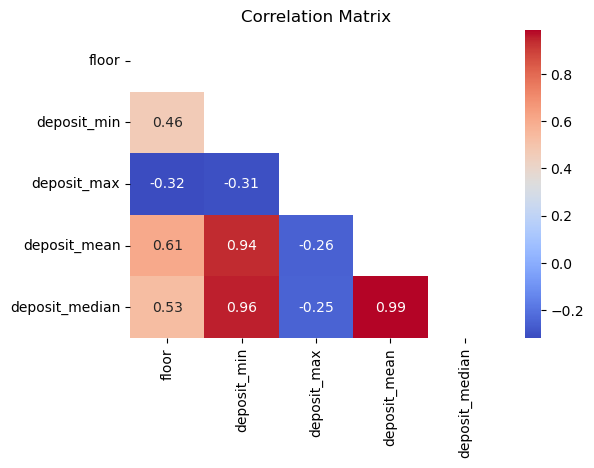

In [86]:
import seaborn as sns

correlation_matrix = floor_data.corr()

# 상삼각형 마스크 만들기
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- 위도/경도가 같은 매물들의 층수별 가격을 파악해보자

In [41]:
train_data.groupby(['latitude','longitude']).apply(lambda x: x)

C:\Users\com\AppData\Local\Temp\ipykernel_5724\562373842.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



index  area_m2  contract_year_month  \
latitude  longitude                                                 
36.917910 126.908029 882        882  59.7900               202003   
                     163813  163813  78.0500               202101   
                     332764  332764  78.0500               202106   
                     332765  332765  78.0500               202107   
                     332766  332766  59.7900               202110   
...                             ...      ...                  ...   
38.106033 127.077652 790513  790513  84.8659               202306   
                     790514  790514  84.8659               202309   
                     790515  790515  84.8659               202310   
                     790516  790516  84.8659               202311   
38.181937 127.105145 14694    14694  83.2700               201910   

                             contract_day  contract_type  floor  built_year  \
latitude  longitude                                                           
36.917910 126.908029 882                5              2     14        1996   
                     163813            20              2      9        1996   
                     332764            28              0     10        1996   
                     332765            21              0      6        1996   
                     332766            21              2      3        1996   
...                                   ...            ...    ...         ...   
38.106033 127.077652 790513            21              0      3        2014   
                     790514            23              1     14        2014   
                     790515            18              0      6        2014   
                     790516            14              0     13        2014   
38.181937 127.105145 14694             16              2      1        1998   

                              latitude   longitude  age  deposit  
latitude  longitude                                               
36.917910 126.908029 882     36.917910  126.908029   24   5000.0  
                     163813  36.917910  126.908029   25   7000.0  
                     332764  36.917910  126.908029   25   7000.0  
                     332765  36.917910  126.908029   25   7000.0  
                     332766  36.917910  126.908029   25   6000.0  
...                                ...         ...  ...      ...  
38.106033 127.077652 790513  38.106033  127.077652    9  10000.0  
                     790514  38.106033  127.077652    9  12000.0  
                     790515  38.106033  127.077652    9  10000.0  
                     790516  38.106033  127.077652    9  10000.0  
38.181937 127.105145 14694   38.181937  127.105145   21   2500.0  

[1801228 rows x 11 columns]

In [42]:
train_data['group'] = train_data.groupby(['latitude', 'longitude']).ngroup()
train_data.groupby(['group']).apply(lambda x: x).head(17)

C:\Users\com\AppData\Local\Temp\ipykernel_5724\1925652164.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



index  area_m2  contract_year_month  contract_day  \
group                                                              
0     882        882    59.79               202003             5   
      163813  163813    78.05               202101            20   
      332764  332764    78.05               202106            28   
      332765  332765    78.05               202107            21   
      332766  332766    59.79               202110            21   
      332767  332767    59.79               202112             3   
      332768  332768    59.79               202112             3   
      332769  332769    59.79               202112             3   
      332770  332770    59.79               202203             8   
      332771  332771    78.05               202203            18   
      332772  332772    78.05               202203            18   
      549378  549378    59.79               202204            23   
      549379  549379    84.59               202205            11   
      549380  549380    78.05               202212             2   
      549381  549381    78.05               202301            11   
      549382  549382    78.05               202303            23   
      775455  775455    78.05               202304            11   

              contract_type  floor  built_year  latitude   longitude  age  \
group                                                                       
0     882                 2     14        1996  36.91791  126.908029   24   
      163813              2      9        1996  36.91791  126.908029   25   
      332764              0     10        1996  36.91791  126.908029   25   
      332765              0      6        1996  36.91791  126.908029   25   
      332766              2      3        1996  36.91791  126.908029   25   
      332767              2      1        1996  36.91791  126.908029   25   
      332768              2      1        1996  36.91791  126.908029   25   
      332769              0      1        1996  36.91791  126.908029   25   
      332770              2      9        1996  36.91791  126.908029   26   
      332771              0      8        1996  36.91791  126.908029   26   
      332772              0      8        1996  36.91791  126.908029   26   
      549378              0      8        1996  36.91791  126.908029   26   
      549379              0      1        1996  36.91791  126.908029   26   
      549380              0     14        1996  36.91791  126.908029   26   
      549381              0      9        1996  36.91791  126.908029   27   
      549382              0      7        1996  36.91791  126.908029   27   
      775455              0      2        1996  36.91791  126.908029   27   

              deposit  group  
group                         
0     882      5000.0      0  
      163813   7000.0      0  
      332764   7000.0      0  
      332765   7000.0      0  
      332766   6000.0      0  
      332767   6500.0      0  
      332768   6500.0      0  
      332769   6500.0      0  
      332770   6000.0      0  
      332771  10000.0      0  
      332772  10000.0      0  
      549378   6500.0      0  
      549379   7000.0      0  
      549380   8000.0      0  
      549381   9000.0      0  
      549382   8000.0      0  
      775455   9000.0      0

In [22]:
floor_price_by_group = train_data.groupby(['group', 'floor'])['deposit'].mean().reset_index()
floor_price_by_group

,group,floor,deposit
0,0,1,6625.0
1,0,2,9000.0
2,0,3,6000.0
3,0,6,7000.0
4,0,7,8000.0
...,...,...,...
189544,18489,10,13000.0
189545,18489,12,15000.0
189546,18489,13,10000.0
189547,18489,14,13000.0


In [11]:
import plotly.express as px
filter_data = train_data[train_data['group'].isin(range(5,10))]

grouped_data = filter_data.groupby(['group', 'floor'])['deposit'].mean().reset_index()
fig = px.line(grouped_data, x='floor', y='deposit', color='group',
              title='층수별 가격 변화 (그룹별, 특정 그룹만)',
              labels={'floor': '층수', 'deposit': '가격', 'group': '그룹'})
fig.show()

In [12]:
from scipy.stats import pearsonr

# 상관계수를 저장할 리스트
correlation_results = []

# 각 그룹별로 'floor'와 'deposit'의 상관관계를 계산
for group, data in train_data.groupby('group'):
    # 그룹 내에서 floor와 deposit 사이의 상관계수를 계산
    if len(data['floor']) > 1 and len(data['deposit']) > 1:  # 상관계수 계산을 위한 최소한의 데이터 필요
        corr, _ = pearsonr(data['floor'], data['deposit'])
        correlation_results.append({'group': group, 'correlation': corr})

# 결과를 데이터프레임으로 변환
correlation_df = pd.DataFrame(correlation_results)

# 상관계수 결과 확인
print(correlation_df)

c:\Users\com\miniconda3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



       group  correlation
0          0     0.063223
1          1     0.050699
2          2    -0.944911
3          3     0.185388
4          4     0.585987
...      ...          ...
17287  18485          NaN
17288  18486    -0.333333
17289  18487     0.262948
17290  18488     0.222103
17291  18489     0.382934

[17292 rows x 2 columns]


In [13]:
fig = px.histogram(correlation_df, x='correlation', nbins=50,
                   title='Group-wise Correlation between Floor and Deposit',
                   labels={'correlation': 'Correlation Coefficient'})

fig.show()

각 그룹별로 층수와 전세가와의 상관관계를 비교해보았지만 대부분의 그룹은 층수와 전세가와 상관관계를 보이지 않고 있다.

In [25]:
import os

# 해당 디렉토리의 파일 리스트를 출력하여 경로가 제대로 설정되었는지 확인
print(os.listdir(r'C:\Users\com\Documents\GitHub\level2-competitiveds-recsys-06\src\pre_procecss'))


['feature_add.py', 'interface.py', '__init__.py', '__pycache__']


In [30]:
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(""))))


In [31]:
from src.pre_procecss.feature_add import FeatureAddition

In [45]:
Feature = FeatureAddition(train_data)
Feature.create_area_price()
Feature.get_data()

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,group,apt_idx,area,area_price,area_m2_price
0,0,84.9981,201906,25,2,9,2019,37.054314,127.045216,0,17000.0,315,0,25.8,200.004471,200.004471
1,1,84.9981,202003,26,2,20,2019,37.054314,127.045216,1,23000.0,315,0,25.8,270.594284,270.594284
2,2,84.9981,202003,28,2,8,2019,37.054314,127.045216,1,23000.0,315,0,25.8,270.594284,270.594284
3,3,59.3400,201907,15,2,1,1986,36.964647,127.055847,33,5000.0,16,1,18.0,84.260195,84.260195
4,4,59.8100,201904,12,2,6,1995,36.972390,127.084514,24,1800.0,19,2,18.1,30.095302,30.095302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801223,1801223,114.8126,202311,25,0,5,2010,37.528394,126.659398,13,39000.0,10952,17869,34.8,339.683972,339.683972
1801224,1801224,101.9088,202311,28,0,6,2010,37.528394,126.659398,13,38000.0,10952,17869,30.9,372.882420,372.882420
1801225,1801225,114.7900,202312,3,0,19,2010,37.528394,126.659398,13,37000.0,10952,17869,34.8,322.327729,322.327729
1801226,1801226,101.9088,202312,4,1,15,2010,37.528394,126.659398,13,34400.0,10952,17869,30.9,337.556717,337.556717


In [46]:
df = Feature.get_data()
df

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,group,apt_idx,area,area_price,area_m2_price
0,0,84.9981,201906,25,2,9,2019,37.054314,127.045216,0,17000.0,315,0,25.8,200.004471,200.004471
1,1,84.9981,202003,26,2,20,2019,37.054314,127.045216,1,23000.0,315,0,25.8,270.594284,270.594284
2,2,84.9981,202003,28,2,8,2019,37.054314,127.045216,1,23000.0,315,0,25.8,270.594284,270.594284
3,3,59.3400,201907,15,2,1,1986,36.964647,127.055847,33,5000.0,16,1,18.0,84.260195,84.260195
4,4,59.8100,201904,12,2,6,1995,36.972390,127.084514,24,1800.0,19,2,18.1,30.095302,30.095302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801223,1801223,114.8126,202311,25,0,5,2010,37.528394,126.659398,13,39000.0,10952,17869,34.8,339.683972,339.683972
1801224,1801224,101.9088,202311,28,0,6,2010,37.528394,126.659398,13,38000.0,10952,17869,30.9,372.882420,372.882420
1801225,1801225,114.7900,202312,3,0,19,2010,37.528394,126.659398,13,37000.0,10952,17869,34.8,322.327729,322.327729
1801226,1801226,101.9088,202312,4,1,15,2010,37.528394,126.659398,13,34400.0,10952,17869,30.9,337.556717,337.556717


가설2. 건물나이가 최신일수록 가격이 높을 것이다.

In [87]:
# 건물 나이 확인
age_check = train_data['age'].value_counts().sort_index(ascending=True)
age_check

age
-3         4
-2        28
-1      3419
 0     83870
 1     40128
       ...  
 58        2
 59        2
 60        5
 61        5
 62        5
Name: count, Length: 66, dtype: int64

In [89]:
train_data.groupby(['age']).max()

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,deposit
age,,,,,,,,,,
-3,1112268,112.8600,202109,20,2,16,2024,37.816934,127.082375,146900.0
-2,1311467,84.9800,202112,31,2,38,2023,37.723645,127.212458,90000.0
-1,1766157,219.4300,202312,31,2,48,2024,37.901215,127.500885,700000.0
0,1798554,244.3478,202312,31,2,63,2023,38.104768,127.649138,780000.0
1,1799125,273.9600,202312,31,2,49,2022,38.037462,127.649138,950000.0
...,...,...,...,...,...,...,...,...,...,...
58,1588395,46.2600,202311,25,1,5,1965,37.567293,126.970312,30000.0
59,1138942,55.9800,202011,30,2,5,1961,37.487755,126.886169,17000.0
60,1259545,59.9200,202110,27,2,5,1961,37.487755,126.887502,20000.0


In [105]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# age로 그룹화한 후 min, max, mean 계산
age_data = train_data.groupby('age').agg({
    'deposit': ['min', 'max', 'mean', 'median']
}).reset_index()

# 컬럼 이름 재설정 (멀티 인덱스이기 때문에 컬럼 이름을 평평하게 만들어야 함)
age_data.columns = ['age', 'deposit_min', 'deposit_max', 'deposit_mean', 'deposit_median']

fig = make_subplots(
    rows= 4,
    cols= 1,
    shared_xaxes=True,
    subplot_titles= (
        'Min',
        'Max',
        'Mean',
        'Median',
    )
)

# Min 값을 그리는 라인
fig.add_trace(go.Scatter(x=age_data["age"], y=age_data["deposit_min"], mode='lines', name='Min'),row=1,col=1)

# Max 값을 그리는 라인
fig.add_trace(go.Scatter(x=age_data["age"], y=age_data["deposit_max"], mode='lines', name='Max'),row=2,col=1)

# Mean 값을 그리는 라인
fig.add_trace(go.Scatter(x=age_data["age"], y=age_data["deposit_mean"], mode='lines', name='Mean'),row=3,col=1)

# Median 값을 그리는 라인
fig.add_trace(go.Scatter(x=age_data["age"], y=age_data["deposit_median"], mode='lines', name='Median'),row=4,col=1)

fig.update_layout(title_text="Age vs Deposit (Min, Max, Mean)", showlegend=True)
fig.update_xaxes(title_text="Age")
fig.update_yaxes(title_text="Deposit")

fig.show()


In [107]:
# 나이와 가격간의 상관계수 확인
correlation = train_data['age'].corr(train_data['deposit'])
print(f"Correlation between floor and deposit: {correlation}")

Correlation between floor and deposit: -0.1364791731081178


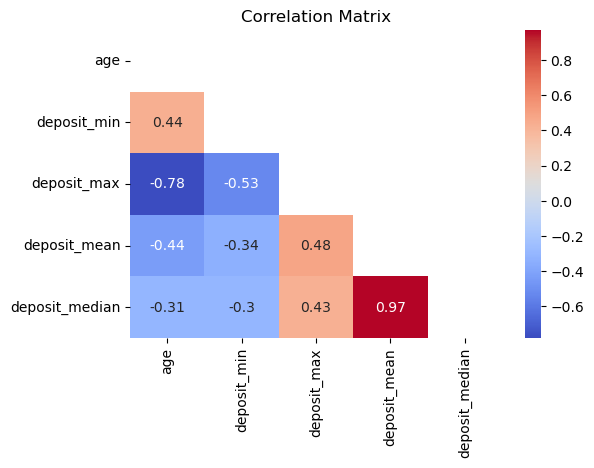

In [108]:
correlation_matrix = age_data.corr()

# 상삼각형 마스크 만들기
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [123]:
sorted_data = train_data[train_data['age'] >= 40].sort_values(by=['deposit'])
sorted_data.describe()

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit
count,2.842100e+04,28421.000000,28421.000000,28421.000000,28421.000000,28421.000000,28421.000000,28421.000000,28421.000000,28421.000000,28421.000000
mean,1.276174e+06,88.498024,202152.359910,15.838535,1.138806,6.472573,1977.954541,37.509313,126.996673,43.502727,50795.064002
std,2.752569e+05,32.483007,136.694859,8.654983,0.865139,3.888152,3.364818,0.044114,0.100265,3.252515,31774.880745
min,1.645500e+04,17.360000,201904.000000,1.000000,0.000000,-1.000000,1961.000000,36.989734,126.606059,40.000000,1000.000000
25%,1.093797e+06,69.850000,202010.000000,8.000000,0.000000,3.000000,1977.000000,37.497741,126.943625,41.000000,29000.000000
50%,1.301806e+06,82.450000,202202.000000,16.000000,1.000000,6.000000,1978.000000,37.515759,127.020817,43.000000,47250.000000
75%,1.497590e+06,102.150000,202303.000000,23.000000,2.000000,10.000000,1980.000000,37.527955,127.065070,45.000000,65000.000000
max,1.796072e+06,317.360000,202312.000000,31.000000,2.000000,18.000000,1983.000000,37.855950,127.204015,62.000000,400000.000000


전체 컬럼에 대한 상관계수 확인

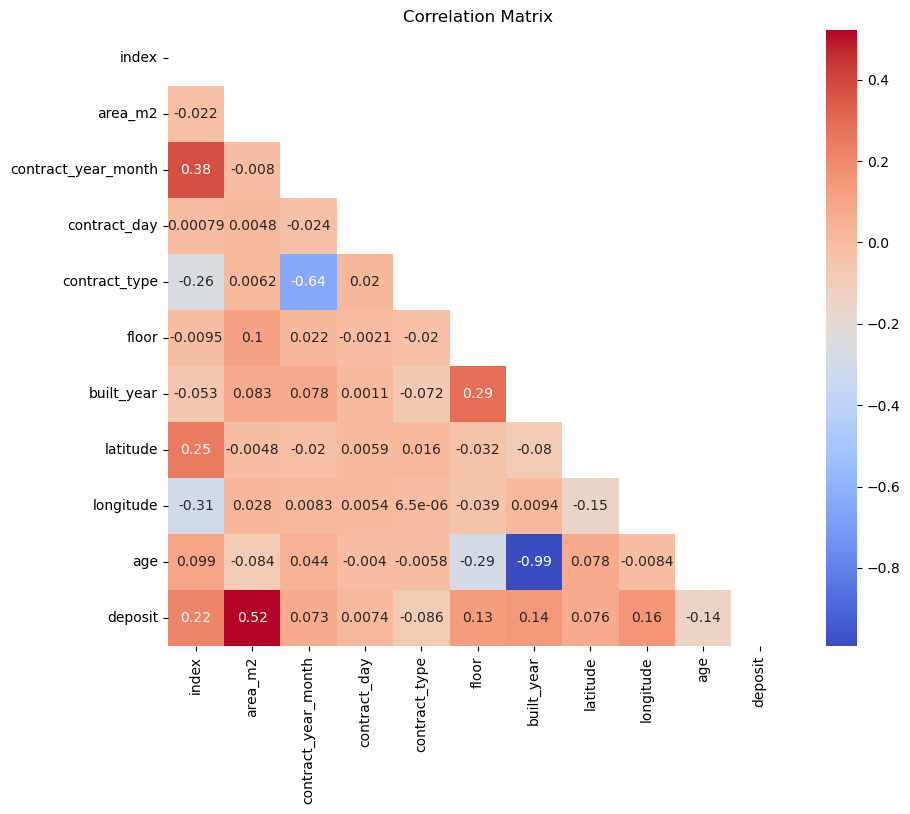

In [120]:
# 전체 컬럼에 대한 상관계수 확인

correlation_matrix = train_data.corr()

# 상삼각형 마스크 만들기
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

가설3. 이사시즌과 전세가격이 상관관계가 있을 것이다.

In [8]:
train_data['contract_year_month'] = pd.to_datetime(train_data["contract_year_month"], format='%Y%m')


In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# age로 그룹화한 후 min, max, mean 계산
contract_data = train_data.groupby('contract_year_month').agg({
    'deposit': ['min', 'max', 'mean', 'median']
}).reset_index()

# 컬럼 이름 재설정 (멀티 인덱스이기 때문에 컬럼 이름을 평평하게 만들어야 함)
contract_data.columns = ['contract', 'deposit_min', 'deposit_max', 'deposit_mean', 'deposit_median']

fig = make_subplots(
    rows= 4,
    cols= 1,
    shared_xaxes=True,
    subplot_titles= (
        'Min',
        'Max',
        'Mean',
        'Median',
    )
)

# Min 값을 그리는 라인
fig.add_trace(go.Scatter(x=contract_data["contract"], y=contract_data["deposit_min"], mode='lines', name='Min'),row=1,col=1)

# Max 값을 그리는 라인
fig.add_trace(go.Scatter(x=contract_data["contract"], y=contract_data["deposit_max"], mode='lines', name='Max'),row=2,col=1)

# Mean 값을 그리는 라인
fig.add_trace(go.Scatter(x=contract_data["contract"], y=contract_data["deposit_mean"], mode='lines', name='Mean'),row=3,col=1)

# Median 값을 그리는 라인
fig.add_trace(go.Scatter(x=contract_data["contract"], y=contract_data["deposit_median"], mode='lines', name='Median'),row=4,col=1)

fig.update_layout(title_text="Contract vs Deposit (Min, Max, Mean, Median)", showlegend=True)
fig.update_xaxes(title_text="Contract")
fig.update_yaxes(title_text="Deposit")

fig.show()


In [40]:
contract_data['deposit_change']= contract_data['deposit_mean'].pct_change() * 100
contract_data['month'] = pd.to_datetime(contract_data['contract']).dt.strftime('%m')  # 월 정보 생성

fig = make_subplots()

# Bar plot 추가 및 막대 위에 월 정보 표시 (text 속성 사용)
fig.add_trace(go.Bar(x=contract_data['contract'], 
                     y=contract_data['deposit_change'],
                     text=contract_data['month'],  # 막대 위에 표시할 월 정보
                     textposition='outside',  # 텍스트 위치 설정 (자동으로 막대 위에 표시)
                     name='Deposit Change'))


fig.update_layout(title='Deposit Change with Month Information Displayed',
                  xaxis_title='Contract',
                  yaxis_title='Deposit Change (%)')

# 그래프 출력
fig.show()

In [29]:
fig = make_subplots()

fig.add_trace(go.Bar(x=contract_data['contract'], 
                     y=contract_data['deposit_mean'],
                     text=contract_data['month'],
                     textposition='outside',
                     name='Deposit Change'))

fig.update_layout(title='Deposit Mean with Month Information Displayed',
                  xaxis_title='Contract',
                  yaxis_title='Deposit')

가설4. 거래량 파악